# Projekt Elektrostatik
Autoren: Albertin, Schegg

## Aufgabe 1:

### Aufgabe a):

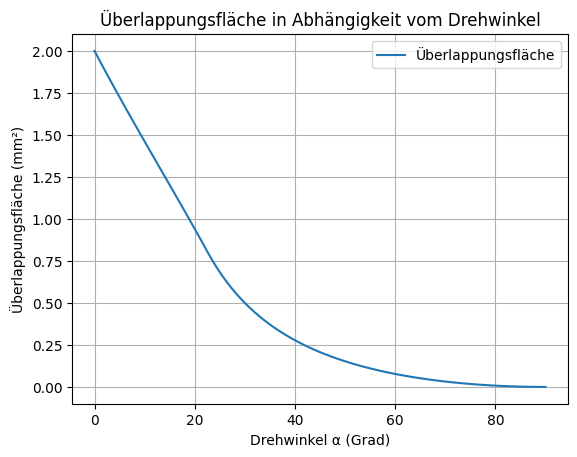

In [51]:
import numpy as np
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

# Geometrie der festen Platte
feste_platte = Polygon([(0, 0), (2, 0), (2, 1), (0, 1)])

# Funktion zur Berechnung der Drehung
def rotiere_platte(alpha, drehachse=(-0.5, 0.5)):
    # Ecken der Platte relativ zur Drehachse
    ecken = np.array([[0.5, -0.5], [2.5, -0.5], [2.5, 0.5], [0.5, 0.5]])
    alpha_rad = np.radians(alpha)
    
    # Rotationsmatrix
    R = np.array([[np.cos(alpha_rad), -np.sin(alpha_rad)],
                  [np.sin(alpha_rad), np.cos(alpha_rad)]])
    
    # Drehung der Ecken
    ecken_rotiert = np.dot(ecken, R.T) + drehachse
    return Polygon(ecken_rotiert)

# Winkelbereich definieren
winkel_alpha = np.linspace(0, 90, 100)
ueberlappungsflaechen = []

# Überlappungsflächen berechnen
for alpha in winkel_alpha:
    dreh_platte = rotiere_platte(alpha)
    schnitt = feste_platte.intersection(dreh_platte)
    ueberlappungsflaechen.append(schnitt.area)

# Ergebnisse plotten
plt.plot(winkel_alpha, ueberlappungsflaechen, label="Überlappungsfläche")
plt.xlabel("Drehwinkel α (Grad)")
plt.ylabel("Überlappungsfläche (mm²)")
plt.title("Überlappungsfläche in Abhängigkeit vom Drehwinkel")
plt.grid()
plt.legend()

### Aufgabe b):

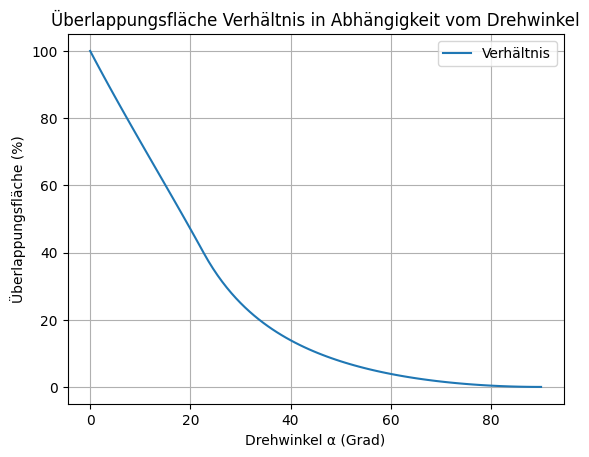

In [52]:
# Ergebnisse plotten aufgabe b)
A = 2 # Fläche in (mm²)

ueberlappungsflaechenb = [100*element/A for element in ueberlappungsflaechen]
plt.plot(winkel_alpha, ueberlappungsflaechenb, label="Verhältnis")
plt.xlabel("Drehwinkel α (Grad)")
plt.ylabel("Überlappungsfläche (%)")
plt.title("Überlappungsfläche Verhältnis in Abhängigkeit vom Drehwinkel")
plt.grid()
plt.legend()

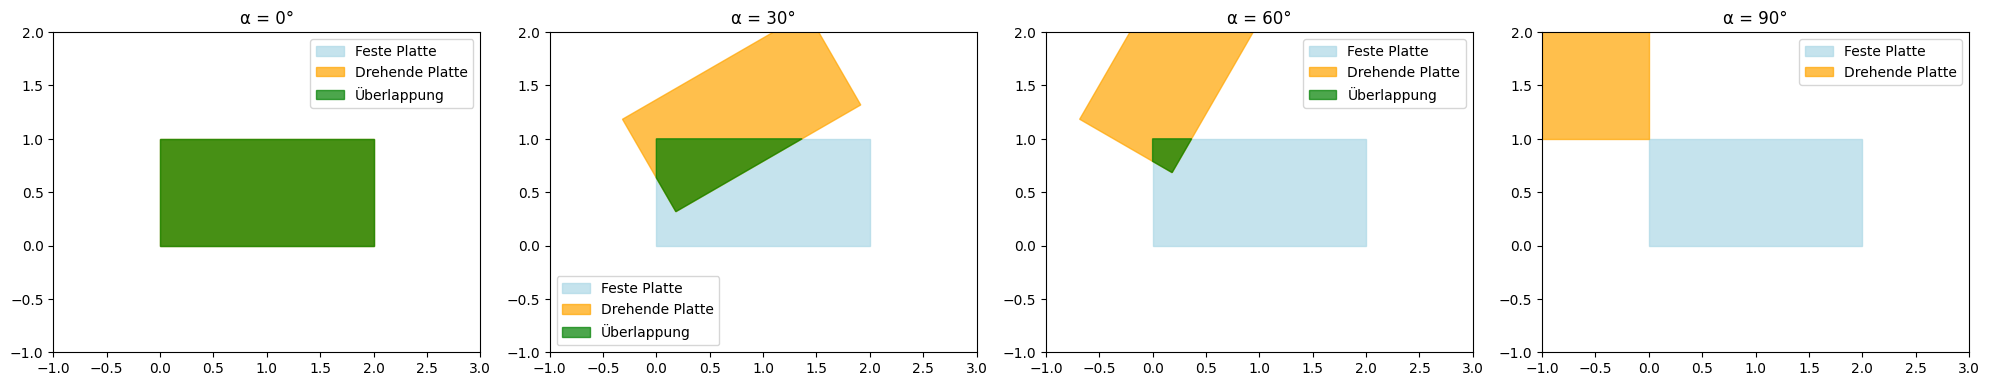

In [53]:
# Plot der Platten für ausgewählte Winkel
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
angles_to_plot = [0, 30, 60, 90]

for ax, angle in zip(axes, angles_to_plot):
    dreh_platte = rotiere_platte(angle)
    
    # Feste Platte plotten
    x, y = feste_platte.exterior.xy
    ax.fill(x, y, color='lightblue', alpha=0.7, label="Feste Platte")
    
    # Drehende Platte plotten
    x, y = dreh_platte.exterior.xy
    ax.fill(x, y, color='orange', alpha=0.7, label="Drehende Platte")
    
    # Überlappung plotten
    schnitt = feste_platte.intersection(dreh_platte)
    
    # exterior funktioniert nicht für Punkte
    if not schnitt.is_empty and angle != 90:
        x, y = schnitt.exterior.xy
        ax.fill(x, y, color='green', alpha=0.7, label="Überlappung")
    
    ax.set_xlim(-1, 3)
    ax.set_ylim(-1, 2)
    ax.set_aspect('equal')
    ax.set_title(f'α = {angle}°')
    ax.legend()

plt.tight_layout()